# Illustrations of the Distribution class
Author: Michael D. Shields  
Date: 8/16/18     
Last modified on 5/4/2020 by Audrey Olivier

This examples shows the use of the Distribution class. In particular:
- How to define and use one of the univariate distributions supported by UQpy,
- How to define a custom distribution,
- How to define a multivariate distribution by 1) giving a list of independent marginals or 2) giving a list of marginals and a copula to model the dependence structure.

Import the necessary modules. Note that the user only needs to make use of the Distribution class of the Distributions module.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## Example of a univariate distribution
Define a univariate lognormal distribution, call its methods to compute its pdf, cdf, icdf, moments and samples random variables.

In [2]:
from UQpy.Distributions import Lognormal
dist = Lognormal(s=1., loc=0., scale=np.exp(5))
print(dist)
print(dist.params)

{'s': 1.0, 'loc': 0.0, 'scale': 148.4131591025766}


### Plot the pdf of the distribution. 

The user must provide x as a ndarray of shape (nsamples, 1) or (nsamples,) - the former if preferred. The result of pdf or log_pdf will be a 1D array (nsamples, ).

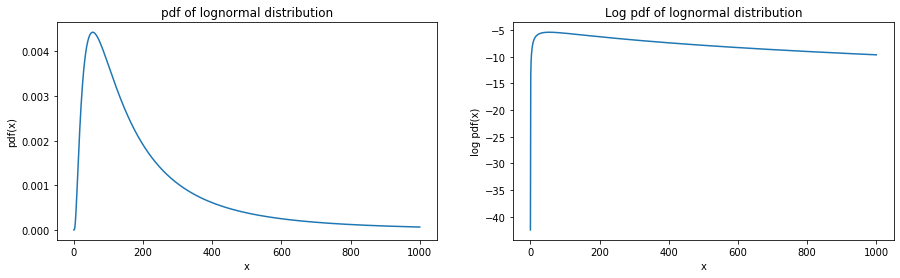

size of input x:
(1000, 1)
size of dist.pdf(x):
(1000,)


In [3]:
x = np.linspace(0.01,1000,1000).reshape((-1, 1))   # Use reshape to provide a 2D array (1000, 1)
fig, ax = plt.subplots(ncols=2, figsize = (15,4))
ax[0].plot(x, dist.pdf(x))   # Do not give params
ax[0].set_xlabel('x')
ax[0].set_ylabel('pdf(x)')
ax[0].set_title('pdf of lognormal distribution')

ax[1].plot(x, dist.log_pdf(x))
ax[1].set_xlabel('x')
ax[1].set_ylabel('log pdf(x)')
ax[1].set_title('Log pdf of lognormal distribution')
plt.show()

print('size of input x:')
print(x.shape)
print('size of dist.pdf(x):')
print(dist.pdf(x).shape)

### Modify one of the parameters of the distribution.

Use the update_params method.

In [ ]:
dist.update_params(loc=100.)
print(dist.params)

In [ ]:
x = np.linspace(0.01,1000,1000).reshape((-1, 1))   # Use reshape to provide a 2D array (1000, 1)
fig, ax = plt.subplots(ncols=2, figsize = (15,4))
ax[0].plot(x, dist.pdf(x))   # Do not give params
ax[0].set_xlabel('x')
ax[0].set_ylabel('pdf(x)')
ax[0].set_title('pdf of lognormal distribution')

ax[1].plot(x, dist.log_pdf(x))
ax[1].set_xlabel('x')
ax[1].set_ylabel('log pdf(x)')
ax[1].set_title('Log pdf of lognormal distribution')
plt.show()

### Print the mean, standard deviation, skewness, and kurtosis of the distribution. 

In [ ]:
moments_list = ['mean', 'variance', 'skewness', 'kurtosis']
m = dist.moments()
print('Moments with inherited parameters:')
for i, moment in enumerate(moments_list):
    print(moment+' = {0:.2f}'.format(m[i]))

### Generate 5000 random samples from the lognormal distribution.

The number of samples is provided as nsamples (default 1). The user can fix the seed of the pseudo random generator via input random_state.

Important: the output of rvs is a (nsamples, 1) ndarray.

In [ ]:
y1 = dist.rvs(nsamples=10000)
print('Shape of output provided by rvs is (nsamples, dimension), i.e. here:')
print(y1.shape)
plt.hist(y1[:, 0], bins=50)
plt.xlabel('x')
plt.ylabel('count')
plt.show()

### Example of a uniform distribution

In [ ]:
from UQpy.Distributions import Uniform
print(Uniform.__bases__)
d1 = Uniform(loc=1., scale=2.)
print(d1.params)
print(d1.cdf(x=[0., 1., 2., 3.]))
print(d1.rvs(nsamples=2, random_state=123))
d1.update_params(loc=0.)
print(d1.params)

### Normal distribution and the use of mle method. 

Parameters to be learnt should be instantiated as None:

In [ ]:
from UQpy.Distributions import Normal
print(Normal(loc=None, scale=None).mle(x=[-4, 2, 2, 1]))
print(Normal(loc=0., scale=None).mle(x=[-4, 2, 2, 1]))

### Example of a 1D discrete distribution

In [ ]:
from UQpy.Distributions import Binomial
print(Binomial.__bases__)
dist = Binomial(n=5, p=0.4)
print(dist.rvs(nsamples=3, random_state=123))

## Multivariate distributions

### Supported multivariate normal

In [ ]:
from UQpy.Distributions import MVNormal
print(MVNormal.__bases__)
dist = MVNormal(mean=[1., 2.], cov=[[4., -0.2], [-0.2, 1.]])
print(dist.rvs(nsamples=5, random_state=123))

### Example of a multivariate distribution provided with independent marginals

Create a bivariate distribution as a product of two independent univariate distributions: a normal and a lognormal. Then draw some random samples (left plot below) and plot the pdf (right contour plot).

In [ ]:
from UQpy.Distributions import Normal, JointInd
marginals = [Normal(loc=2., scale=2.), 
             Lognormal(s=1., loc=0., scale=np.exp(5))]

dist = JointInd(marginals=marginals)
print(dist.get_params())
print(dist.rvs(nsamples=3, random_state=123))

In [ ]:
y = dist.rvs(nsamples=1000)
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].scatter(y[:,0], y[:,1], alpha=0.2)
ax[0].set_xlabel('dimension 1')
ax[0].set_ylabel('dimension 2')
ax[0].set_title('random samples')
ax[0].set_ylim([0, 500])
ax[0].set_xlim([-2, 6])

x = np.arange(-2.0, 6.0, 0.2)
y = np.arange(0.01, 500, 1)
X, Y = np.meshgrid(x, y)
Z = dist.pdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1))
CS = ax[1].contour(X, Y, Z.reshape(X.shape))
ax[1].clabel(CS, inline=1, fontsize=10)
ax[1].set_xlabel('dimension 1')
ax[1].set_ylabel('dimension 2')
ax[1].set_title('Contour plot of pdf')
ax[0].set_ylim([0, 500])
ax[0].set_xlim([-2, 6])
plt.show()

The update_params method behave differently here:

In [ ]:
print(dist)
print()
print('Parameters of the joint:')
print(dist.params)
print('Parameters of the marginals:')
print([m.params for m in marginals])
print(dist.get_params())
print()
print('Update the location parameter of the second marginal and scale parameter of first marginal...')
dist.update_params(loc_1=1., scale_0=3.)
print('Parameters of the joint:')
print(dist.params)
print('Parameters of the marginals:')
print([m.params for m in marginals])
print(dist.get_params())

## Example of a multivariate distribution provided with marginals and copula

In [ ]:
from UQpy.Distributions import Gumbel, JointCopula
marginals = [Normal(loc=0., scale=1), 
             Normal(loc=0., scale=1)]
copula = Gumbel(theta=3.)

In [ ]:
# dist_1 is a multivariate normal with independent marginals
dist_1 = JointInd(marginals)
print('Does the distribution with independent margianls have an rvs method?')
print(hasattr(dist_1, 'rvs'))

# dist_2 exhibits dependence between the two dimensions, defined using a gumbel copula
dist_2 = JointCopula(marginals=marginals, copula=copula)
print('Does the distribution with copula have an rvs method?')
print(hasattr(dist_2, 'rvs'))

In [ ]:
print(dist_2.copula.params)
dist_2.update_params(theta_c=2.)
print(dist_2.copula.params)

Compare pdfs for dist_1 and dist_2.

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_1.pdf(x=np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1))
CS = ax[0].contour(X, Y, Z.reshape(X.shape))
ax[0].clabel(CS, inline=1, fontsize=10)
ax[0].set_title('Contour plot of pdf - independent normals')

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_2.pdf(x=np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1))
CS = ax[1].contour(X, Y, Z.reshape(X.shape))
ax[1].clabel(CS, inline=1, fontsize=10)
ax[1].set_title('Contour plot of pdf - normals with Gumbel copula')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121, projection='3d')
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_1.cdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1))
CS = ax.plot_surface(X, Y, Z.reshape(X.shape), cmap='jet')
ax.clabel(CS, inline=1, fontsize=10, color='black')
ax.set_title('Surface plot of cdf - independent normals')

ax = fig.add_subplot(122, projection='3d')
x = np.arange(-3, 3, 0.05)
y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(x, y)
Z = dist_2.cdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1))
CS = ax.plot_surface(X, Y, Z.reshape(X.shape), cmap='jet')
ax.clabel(CS, inline=1, fontsize=10, color='black')
ax.set_title('Surface plot of cdf - normals with Gumbel copula')
plt.show()

# contour plots
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist_1.cdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1))
CS = ax.contour(X, Y, Z.reshape(X.shape), cmap='jet')
#ax.clabel(CS, inline=1, fontsize=10, color='black')
ax.set_title('Contour plot of cdf - independent normals')

ax = fig.add_subplot(122)
x = np.arange(-3, 3, 0.05)
y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(x, y)
Z = dist_2.cdf(x = np.concatenate([X.reshape((-1,1)),Y.reshape((-1,1))], axis=1))
CS = ax.contour(X, Y, Z.reshape(X.shape), cmap='jet')
#ax.clabel(CS, inline=1, fontsize=10, color='black')
ax.set_title('Contour plot of cdf - normals with Gumbel copula')
plt.show()

## Example with a custom distribution

Build a custom distribution which inherits from DistributionND. It inherits method update_params. All other methods must be defined by the user as follows.

In [ ]:
from UQpy.Distributions import DistributionND

class Rosenbrock(DistributionND):
    def __init__(self, p=20.):
        super().__init__(p=p)
    def pdf(self, x):
        return np.exp(-(100*(x[:, 1]-x[:, 0]**2)**2+(1-x[:, 0])**2)/self.params['p'])
    def log_pdf(self, x):
        return -(100*(x[:, 1]-x[:, 0]**2)**2+(1-x[:, 0])**2)/self.params['p']

In [ ]:
dist = Rosenbrock(p=20)
print(dist.params)
dist.update_params(p=40)
print(dist.params)

In [ ]:
dist = Rosenbrock(p=20)
print(dist.params)

fig, ax = plt.subplots(figsize=(8,5))
x = np.arange(-5, 8, 0.1)
y = np.arange(-5, 50, 0.1)
X, Y = np.meshgrid(x, y)
Z = dist.pdf(x=np.concatenate([X.reshape((-1, 1)),Y.reshape((-1, 1))], axis=1))
CS = ax.contour(X, Y, Z.reshape(X.shape))
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Contour plot of custom pdf - Rosenbrock')
plt.show()

In [ ]:
print('Does the rosenbrock distribution have an rvs method?')
print(hasattr(dist, 'rvs'))

print('Does the rosenbrock distribution have an pdf method?')
print(hasattr(dist, 'pdf'))

print('Does the rosenbrock distribution have an update_params method?')
print(hasattr(dist, 'update_params'))